In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
L = 256

(0.0, 15000.0)

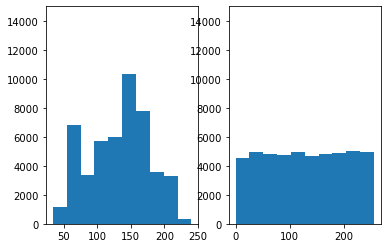

In [22]:
# 1. image : using “cv2.imread”
image = cv2.imread("images/Lenna.png", cv2.IMREAD_GRAYSCALE);
h,w = image.shape

# 2. histogram : using “cv2.calcHist”
hist = cv2.calcHist(images = [image], channels=[0], mask=None, histSize =[L], ranges=[0,L-1])

# 3. cumulative sum vector : using “np.cumsum”
cdf = np.cumsum(hist)

# 4. normalization(cdf_norm): divide by “max of cdf”
cdf_normalized = cdf / np.max(cdf)

# 5. mapping table : using “np.round”
table = np.round(cdf_normalized * L)

# 6. mapping(output) : using “nested loop”
output = np.zeros((h,w))
for i in range(0,h):
    for j in range(0,w):
        output[i,j] = table[image[i,j]]
        output = np.uint8(output)
        
# 7. check the result : using “cv.imshow”
cv2.imshow("Input image", image);
cv2.imshow("histogram equalized image", output);
cv2.waitKey(0)
cv2.destroyAllWindows()

# 8. check the histogram : using “plt.hist and ravel(or flatten)”
plt.subplot(1,2,1); plt.hist(np.ravel(image)); plt.ylim([0, 15000])
plt.subplot(1,2,2); plt.hist(np.ravel(output)); plt.ylim([0, 15000])